# Face Recognition

This work must apply Neural Networks to have face recognition.

The overview of the project can be seen at:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

Participants:
Beatriz Andrade Luiz - CP3016307
Gabriel Marques Molonhoni - CP3016129

## 1. Objective

Solve a face recognition problem using neural networks. Given an image of a person's face, your model must correctly identify whose face it is (out of 83 possible people).

## 2. Dataset
For model development, we considered the PubFig83 dataset. The available dataset contains the following specifications:

* Color images of the faces of 83 artists, totaling 13,840 images extracted from the Internet.
* All images were previously resized to 100x100 pixels, having been aligned according to the position of the people's eyes.

## 3. Setup

In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [5]:
import os
import tensorflow as tf
import numpy as np
import random

def reset_random_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    
# make some random data
reset_random_seeds()

## 4. Development

We are using a class to have the images read and put the path (labels) and the name into class attributes.
We are gonna use the cropped images from crop_face.ipynb for training. The method that crops the face is gonna be used on the test_dataset

In [6]:
import pandas as pd
import numpy as np
import os

Let's create a method to return all paths (images path) from a folder

In [7]:
class ImageClass():
    "Stores the paths to images for a given class"
    def __init__(self, name, image_paths):
        self.name = name
        self.image_paths = image_paths
  
    def __str__(self):
        return self.name + ', ' + str(len(self.image_paths)) + ' images'
  
    def __len__(self):
        return len(self.image_paths)

Let's create a method to have the images read and put into the class said above

In [8]:
def get_image_paths(dir_path):
    image_paths = []
    if os.path.isdir(dir_path):
        images = os.listdir(dir_path)
        image_paths = [os.path.join(dir_path,img) for img in images]
    return image_paths

### 4.1 Read dataset

In [9]:
def load_train_dataset(path):
    dataset = []    

    classes = os.listdir(path)
    classes.sort()
    for i in range(len(classes)):
        class_name = classes[i]
        face_dir = os.path.join(path, class_name)
        image_paths = get_image_paths(face_dir)
        dataset.append(ImageClass(class_name, image_paths))

    return dataset

In [10]:
train_path = './dataset/train_cropped'    
dataset = load_train_dataset(train_path)
str(dataset[0])

'Adam Sandler, 88 images'

Let's flatten the dataset

In [11]:
def get_image_paths_and_labels(dataset):
    image_paths_flat = []
    labels_flat = []
    for i in range(len(dataset)):
        image_paths_flat += dataset[i].image_paths
        labels_flat += [i] * len(dataset[i].image_paths)
    return image_paths_flat, labels_flat

In [12]:
paths, labels = get_image_paths_and_labels(dataset)
print(paths)
print(labels)

['./dataset/train_cropped\\Adam Sandler\\103.jpg', './dataset/train_cropped\\Adam Sandler\\108.jpg', './dataset/train_cropped\\Adam Sandler\\111.jpg', './dataset/train_cropped\\Adam Sandler\\116.jpg', './dataset/train_cropped\\Adam Sandler\\119.jpg', './dataset/train_cropped\\Adam Sandler\\127.jpg', './dataset/train_cropped\\Adam Sandler\\132.jpg', './dataset/train_cropped\\Adam Sandler\\134.jpg', './dataset/train_cropped\\Adam Sandler\\136.jpg', './dataset/train_cropped\\Adam Sandler\\14.jpg', './dataset/train_cropped\\Adam Sandler\\149.jpg', './dataset/train_cropped\\Adam Sandler\\151.jpg', './dataset/train_cropped\\Adam Sandler\\152.jpg', './dataset/train_cropped\\Adam Sandler\\157.jpg', './dataset/train_cropped\\Adam Sandler\\161.jpg', './dataset/train_cropped\\Adam Sandler\\165.jpg', './dataset/train_cropped\\Adam Sandler\\166.jpg', './dataset/train_cropped\\Adam Sandler\\17.jpg', './dataset/train_cropped\\Adam Sandler\\173.jpg', './dataset/train_cropped\\Adam Sandler\\175.jpg', '

In [13]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt

Read a image to check if it's all right

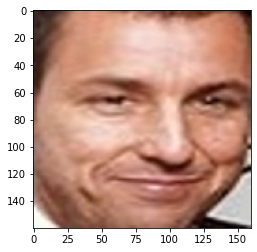

In [14]:
image = Image.open(paths[0])
image = image.convert('RGB')
plt.imshow(image)

### 4.1.1 Split Dataset in training and test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(paths, labels, train_size=0.75, random_state=42)
print(len(x_train))
print(len(x_test))

9097
3033


### 4.2 Model Development

We'll be using Facenet as feature extractor.

The Facenet is a TensorFlow implementation of the face recognizer described in the paper "FaceNet: A Unified Embedding for Face Recognition and Clustering". The project also uses ideas from the paper "Deep Face Recognition" from the Visual Geometry Group at Oxford.

However, for versioning issues, we are gonna use the keras implementation (https://pypi.org/project/keras-facenet/).

On this version, differently from the original from the David Sandberg, this version returns a list of 512 features, instead of 128.



In [16]:
from keras_facenet import FaceNet
model = FaceNet()

In [17]:
train_images = []
for index, img_path in enumerate(x_train):
    image = Image.open(img_path)
    # convert to RGB, if needed
    image = image.convert('RGB')
    image = np.asarray(image)
    train_images.append(image)
    if index % 500 == 0:
            print(f'Vectorizing images... {index}')
train_images = np.asarray(train_images)
train_images.shape

Vectorizing images... 0
Vectorizing images... 500
Vectorizing images... 1000
Vectorizing images... 1500
Vectorizing images... 2000
Vectorizing images... 2500
Vectorizing images... 3000
Vectorizing images... 3500
Vectorizing images... 4000
Vectorizing images... 4500
Vectorizing images... 5000
Vectorizing images... 5500
Vectorizing images... 6000
Vectorizing images... 6500
Vectorizing images... 7000
Vectorizing images... 7500
Vectorizing images... 8000
Vectorizing images... 8500
Vectorizing images... 9000


(9097, 160, 160, 3)

Let's get the features extracted

In [18]:
train_embeddings = model.embeddings(train_images)
print(train_embeddings.shape)


285/285 [==============================] - 70s 241ms/step
(9097, 512)


### 4.3 Classification
The classification will be based on SVM.
For the best hyperparameter, we'll use the GridSearchCV.


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, ], 
              'gamma': [1, 0.1, 0.01, ],
              'kernel': ['linear','rbf', 'poly', 'sigmoid']} 
        
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, n_jobs=-1)
grid.fit(train_embeddings,y_train[:train_embeddings.shape[0]])



Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [28]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


In [24]:
test_images = []
for index, img_path in enumerate(x_test):
    image = Image.open(img_path)
    # convert to RGB, if needed
    image = image.convert('RGB')
    image = np.asarray(image)
    test_images.append(image)


    if index % 500 == 0:
            print(f'Vectorizing for test... {index}')
test_images = np.asarray(test_images)
test_images.shape

Vectorizing for test... 0
Vectorizing for test... 500
Vectorizing for test... 1000
Vectorizing for test... 1500
Vectorizing for test... 2000
Vectorizing for test... 2500
Vectorizing for test... 3000


(3033, 160, 160, 3)

In [25]:
test_embeddings = model.embeddings(test_images)
print(test_embeddings.shape)

95/95 [==============================] - 24s 250ms/step
(3033, 512)


Let's predict on test images

In [26]:
predict = grid.predict(test_embeddings)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      1.00      1.00        23
           2       1.00      0.95      0.97        41
           3       0.95      0.98      0.97        43
           4       1.00      1.00      1.00        22
           5       1.00      0.95      0.98        65
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        30
           8       0.96      1.00      0.98        23
           9       0.99      1.00      0.99        74
          10       1.00      1.00      1.00        58
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        38
          13       1.00      0.97      0.99        36
          14       1.00      1.00      1.00        24
          15       0.97      1.00      0.99        34
          16       1.00      1.00      1.00        32
          17       1.00    

WoW!!! The accuracy is 0.99

Let's train again on all images instead of the splitted

In [31]:
all_images = []
for index, img_path in enumerate(paths):
    image = Image.open(img_path)
    image = image.convert('RGB')
    image = np.asarray(image)
    all_images.append(image)


    if index % 500 == 0:
            print(f'Vectorizing for test... {index}')
all_images = np.asarray(all_images)
all_images.shape

Vectorizing for test... 0
Vectorizing for test... 500
Vectorizing for test... 1000
Vectorizing for test... 1500
Vectorizing for test... 2000
Vectorizing for test... 2500
Vectorizing for test... 3000
Vectorizing for test... 3500
Vectorizing for test... 4000
Vectorizing for test... 4500
Vectorizing for test... 5000
Vectorizing for test... 5500
Vectorizing for test... 6000
Vectorizing for test... 6500
Vectorizing for test... 7000
Vectorizing for test... 7500
Vectorizing for test... 8000
Vectorizing for test... 8500
Vectorizing for test... 9000
Vectorizing for test... 9500
Vectorizing for test... 10000
Vectorizing for test... 10500
Vectorizing for test... 11000
Vectorizing for test... 11500
Vectorizing for test... 12000


(12130, 160, 160, 3)

Let's get the embeddings for all images

In [32]:
train_embeddings = model.embeddings(all_images)
print(train_embeddings.shape)

380/380 [==============================] - 103s 270ms/step
(12130, 512)


... and traing the model again

In [50]:
svm = SVC(C=1, gamma=1, probability=True)
svm.fit(train_embeddings, labels)

SVC(C=1, gamma=1, probability=True)

In [51]:
# Create a list of class names
class_names = [cls.name.replace('_', ' ') for cls in dataset]
print(class_names)

['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon', 'Meg Ryan', 'Meryl Streep', '

Saving our model

In [52]:
classifier_filename = './models/my_classifier.pkl'
classifier_filename_exp = os.path.expanduser(classifier_filename)

In [53]:
import pickle
# Saving classifier model
with open(classifier_filename_exp, 'wb+') as outfile:
    pickle.dump((model, class_names), outfile)
print(f'Saved classifier model to file {classifier_filename_exp}')

INFO:tensorflow:Assets written to: ram://640514ce-e5f1-44c6-9981-3d7fb5917e6c/assets


INFO:tensorflow:Assets written to: ram://640514ce-e5f1-44c6-9981-3d7fb5917e6c/assets


Saved classifier model to file ./models/my_classifier.pkl


### 5. Predict on test dataset

In [54]:
def get_image_paths(dir_path):
    image_paths = []
    if os.path.isdir(dir_path):
        images = os.listdir(dir_path)
        image_paths = [os.path.join(dir_path,img) for img in images]
    return image_paths

In [55]:
test_path = './dataset/test'
test_dataset = get_image_paths(test_path)
print(test_dataset)

['./dataset/test\\0001.jpg', './dataset/test\\0002.jpg', './dataset/test\\0003.jpg', './dataset/test\\0004.jpg', './dataset/test\\0005.jpg', './dataset/test\\0006.jpg', './dataset/test\\0007.jpg', './dataset/test\\0008.jpg', './dataset/test\\0009.jpg', './dataset/test\\0010.jpg', './dataset/test\\0011.jpg', './dataset/test\\0012.jpg', './dataset/test\\0013.jpg', './dataset/test\\0014.jpg', './dataset/test\\0015.jpg', './dataset/test\\0016.jpg', './dataset/test\\0017.jpg', './dataset/test\\0018.jpg', './dataset/test\\0019.jpg', './dataset/test\\0020.jpg', './dataset/test\\0021.jpg', './dataset/test\\0022.jpg', './dataset/test\\0023.jpg', './dataset/test\\0024.jpg', './dataset/test\\0025.jpg', './dataset/test\\0026.jpg', './dataset/test\\0027.jpg', './dataset/test\\0028.jpg', './dataset/test\\0029.jpg', './dataset/test\\0030.jpg', './dataset/test\\0031.jpg', './dataset/test\\0032.jpg', './dataset/test\\0033.jpg', './dataset/test\\0034.jpg', './dataset/test\\0035.jpg', './dataset/test\\00

In [56]:
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from PIL import Image

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
 # load image from file
 image = Image.open(filename)
 # convert to RGB, if needed
 image = image.convert('RGB')
 # convert to array
 pixels = asarray(image)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)

 if not results or results[0]['confidence'] < 0.9:
   return None
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 # bug fix
 x1, y1 = abs(x1), abs(y1)
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 img = Image.fromarray(face)
 img = img.resize(required_size)
 face_array = asarray(img)
 return face_array

In [58]:
predicted = {'image-id': [], 'prediction': []}



for index, img_path in enumerate(test_dataset):
    predicted['image-id'].append(int(os.path.basename(img_path).split('.')[0]))
    face = extract_face(img_path)
    if face is None:
        image = Image.open(img_path)
        image = image.convert('RGB')
        face = np.asarray(image)
    face = face[np.newaxis,:,:]
    print(face.shape)
    embedding = model.embeddings(face)

    predictions = svm.predict_proba(embedding)
    best_class_indices = np.argmax(predictions, axis=1)
    best_class_probabilities = predictions[np.arange(len(best_class_indices)), best_class_indices]


    for H_i in class_names:
        if class_names[best_class_indices[0]] == H_i:
            result = class_names[best_class_indices[0]]
            predicted['prediction'].append(result)

1/1 [==============================] - 0s 77ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 74ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 77ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 78ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 76ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 76ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 77ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 74ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 79ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 75ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 76ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 80ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 78ms/step
(1, 160, 160, 3)
1/1 [==============================] - 0s 73ms/step
(1, 160, 160, 3)
1/1 [=============================

Save our predictions

In [59]:
predicted = pd.DataFrame(predicted)

predicted.to_csv('submission_facenet.csv', index=False)
predicted

,image-id,prediction
0,1,Faith Hill
1,2,Daniel Craig
2,3,Steve Carell
3,4,Alec Baldwin
4,5,Michael Bloomberg
...,...,...
1655,1656,Stephen Colbert
1656,1657,Kate Winslet
1657,1658,Mariah Carey
1658,1659,Jennifer Aniston
